## Final Project Submission

Please fill out:
* Student name: Gabe Vazquez
* Student pace: part time 
* Scheduled project review date/time: 1/24: 6PM
* Instructor name: Jeff Herman
* Blog post URL:


# Obtaining the Data

In [1]:
import pandas as pd

In [2]:
#import the data
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Scrubbing the Data

In [3]:
#import neccessary packages asd set them to their standard alias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Checklist:

1. Check data types and null values.
* Check if we need/ can create a subset of the data.
* Check for multicollinearity to determine if we have predictors that are highly correlated
* Should any columns be removed becuase they do not contain useful information?
* Scale / Normalize our numeric data?
* Deal with categorical columns by one-hot encoding.

#### 1. Check data types and null values.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


##### Data types

Invetigate the unique values inside of `condition` and `grade` becuase these might need to be set to categorical data sets. 

In [5]:
print("Condition:")
print(data.condition.unique())

print("Grade:")
print(data.grade.unique())

Condition:
[3 5 4 1 2]
Grade:
[ 7  6  8 11  9  5 10 12  4  3 13]


It appears that `condition` and `grade` should be categories instead of intergers.

In [6]:
data.condition = data.condition.astype("str")
print("Condition: ", data.condition.dtype)

data.grade = data.grade.astype("str")
print("Grade: ", data.grade.dtype)

Condition:  object
Grade:  object


Check that `sqft_basement` should be converted to a numeric value

In [7]:
data.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

`?` won't be able to be converted to a numeric value. Therefore, change all `?` values to `0`s in order to convert this column to floats.

In [8]:
data['sqft_basement'] = data['sqft_basement'].replace('?', 0) 

In [9]:
data.sqft_basement = data.sqft_basement.astype("float")
print("Sqft Basement: ", data.sqft_basement.dtype)

Sqft Basement:  float64


Convert the `date` column into a month (categorical) columns

In [10]:
data['date'] = pd.to_datetime(data['date'])

In [11]:
data['month'] = data['date'].dt.month

In [12]:
data['month']  = data['month'].astype("str")

In [13]:
data.drop('date', inplace=True, axis=1)

##### Null values

Inspect the data set for null values. These will want to be removed prior to modelling.

In [14]:
data.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
dtype: int64

Because there are so few null values for `view` in prportion the rest of the data set, these null rows can simply be removed.

In [15]:
data = data.dropna(subset=['view'])

The remaining `view` values can be converted to categorical data.

In [16]:
data.view = data.view.astype("str")
print("View: ", data.view.dtype)

View:  object


Further inspect the unique values in `waterfront` and `yr_renovated` to determine its value to the data set.

In [17]:
print("-----Waterfront-----")
print(data.waterfront.unique())
print(data.waterfront.value_counts())

print("-----Year Renovated-----")
print(data.yr_renovated.unique())

-----Waterfront-----
[nan  0.  1.]
0.0    19019
1.0      145
Name: waterfront, dtype: int64
-----Year Renovated-----
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


Convert `waterfront` to categorical data.

In [18]:
data.waterfront = data.waterfront.astype("str")
print("Waterfront: ", data.waterfront.dtype)

Waterfront:  object


Convert `yr_renovated` null values to 0

In [19]:
data['yr_renovated'] = data['yr_renovated'].fillna(0) 

Confirm no more `null` values exist in the data set.

In [20]:
data.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
dtype: int64

#### 2. Check if we need/ can create a subset of the data.

In [21]:
len(data)

21534

This is a large enough data set, to build a model on a subset of the data in order to increase the speed during modeling iterations. 

The `NaN` string values that have been created in the step prior can be removed in order to create this subset.

In [22]:
data = data[data.waterfront != 'nan']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 21 columns):
id               19164 non-null int64
price            19164 non-null float64
bedrooms         19164 non-null int64
bathrooms        19164 non-null float64
sqft_living      19164 non-null int64
sqft_lot         19164 non-null int64
floors           19164 non-null float64
waterfront       19164 non-null object
view             19164 non-null object
condition        19164 non-null object
grade            19164 non-null object
sqft_above       19164 non-null int64
sqft_basement    19164 non-null float64
yr_built         19164 non-null int64
yr_renovated     19164 non-null float64
zipcode          19164 non-null int64
lat              19164 non-null float64
long             19164 non-null float64
sqft_living15    19164 non-null int64
sqft_lot15       19164 non-null int64
month            19164 non-null object
dtypes: float64(7), int64(9), object(5)
memory usage: 3.2+ MB


#### 3. Check for multicollinearity to determine if we have predictors that are highly correlated

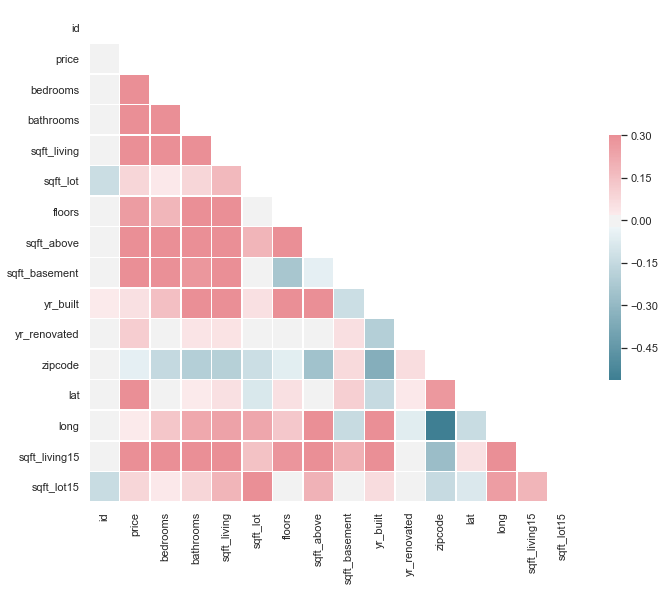

In [23]:
# Set Style
sns.set(style="whitegrid")

#Create Covariance matrix
corr = data.corr()

# Generate a mask the size of the covariance matrix (to prevent invalid data)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Gernerate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, 
            square=True, linewidth=.5, cbar_kws={"shrink":.5})

#### 4. Should any columns be removed becuase they do not contain useful information?

As shown in the heat map above `id` does not have any correlation with most of the data set, so it is best to remove it

In [24]:
data = data.drop('id', 1)

#### 5. Normalize our numeric data (using their z-score)

Check to see what our data currently looks like

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f43c6d8>,
      dtype=object)

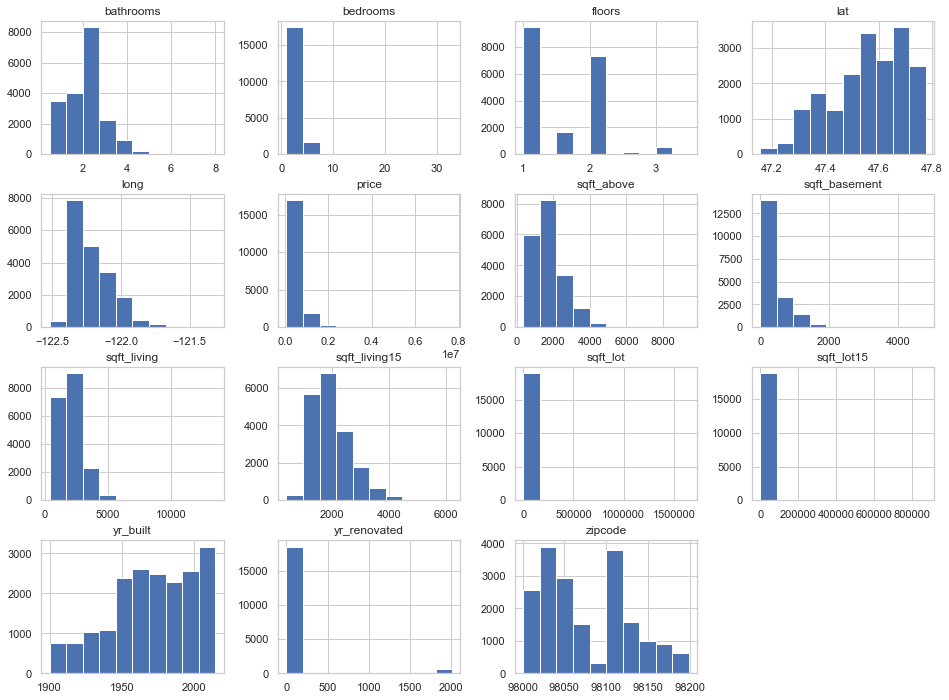

In [25]:
data.hist(figsize=[16,12])

Normalize the skewed data.

In [26]:
skewed = ['bathrooms','bedrooms', 'price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living', 'sqft_lot', 'sqft_lot15', 'yr_renovated']

for predictor in skewed:
    data[predictor] = np.log(data[predictor])
    
data.describe()

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,1.916400e+04,19164.000000,1.916400e+04,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000
mean,13.049479,1.178172,0.678244,2.020110,8.991369,1.495173,7.396138,-inf,1971.039553,-inf,98077.726466,47.560018,-122.214011,1987.221874,8.962083
std,0.527182,0.283247,0.392359,0.056544,0.903029,0.540308,0.428558,NaN,29.388020,NaN,53.448716,0.138661,0.140728,684.787028,0.814010
min,11.264464,0.000000,-0.693147,1.777238,6.253829,1.000000,5.913503,-inf,1900.000000,-inf,98001.000000,47.155900,-122.519000,399.000000,6.478510
25%,12.682307,1.098612,0.559616,1.983127,8.525161,1.000000,7.090077,-inf,1951.000000,-inf,98033.000000,47.471100,-122.328000,1490.000000,8.536996
50%,13.017003,1.098612,0.810930,2.022882,8.938532,1.500000,7.352441,-inf,1975.000000,-inf,98065.000000,47.572000,-122.231000,1840.000000,8.938532
75%,13.375396,1.386294,0.916291,2.059730,9.279866,2.000000,7.704248,6.291569e+00,1997.000000,-inf,98117.000000,47.678100,-122.125000,2360.000000,9.219622
max,15.856731,3.496508,2.079442,2.252702,14.317109,3.500000,9.149528,8.480529e+00,2015.000000,7.608374e+00,98199.000000,47.777600,-121.315000,6210.000000,13.677627


Check how many negative values there are in the `sqft_basement` and `yr_renovated` columns.

In [27]:
print(sum(data["sqft_basement"]<=0))
print(sum(data["yr_renovated"]<=0))

11794
18513


Check to see if makes sense to convert them to their respective medians so as to not disrupt the rest of the aligned data

In [28]:
basement_median = data.sqft_basement.median()
yr_renovated_median = data.yr_renovated.median()

print(basement_median)
print(yr_renovated_median)

-inf
-inf


Convert the neg numbers to 0

In [29]:
for i in data.sqft_basement:
    if i <= 0:
        data.sqft_basement = data['sqft_basement'].replace(i, 0) 

In [30]:
for i in data.yr_renovated:
    if i <= 0:
        data.yr_renovated = data['yr_renovated'].replace(i, 0) 

In [31]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000
mean,13.049479,1.178172,0.678244,2.020110,8.991369,1.495173,7.396138,2.474240,1971.039553,0.258134,98077.726466,47.560018,-122.214011,1987.221874,8.962083
std,0.527182,0.283247,0.392359,0.056544,0.903029,0.540308,0.428558,3.154943,29.388020,1.376590,53.448716,0.138661,0.140728,684.787028,0.814010
min,11.264464,0.000000,-0.693147,1.777238,6.253829,1.000000,5.913503,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,6.478510
25%,12.682307,1.098612,0.559616,1.983127,8.525161,1.000000,7.090077,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,8.536996
50%,13.017003,1.098612,0.810930,2.022882,8.938532,1.500000,7.352441,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.231000,1840.000000,8.938532
75%,13.375396,1.386294,0.916291,2.059730,9.279866,2.000000,7.704248,6.291569,1997.000000,0.000000,98117.000000,47.678100,-122.125000,2360.000000,9.219622
max,15.856731,3.496508,2.079442,2.252702,14.317109,3.500000,9.149528,8.480529,2015.000000,7.608374,98199.000000,47.777600,-121.315000,6210.000000,13.677627


Scale the data with z-score transformation.

In [32]:
data.price = (data.price - data.price.mean()) / data.price.std()
data.bedrooms = (data.bedrooms - data.bedrooms.mean()) / data.bedrooms.std()
data.bathrooms = (data.bathrooms - data.bathrooms.mean()) / data.bathrooms.std()
data.sqft_living = (data.sqft_living - data.sqft_living.mean()) / data.sqft_living.std()
data.sqft_lot = (data.sqft_lot - data.sqft_lot.mean()) / data.sqft_lot.std()
data.floors = (data.floors - data.floors.mean()) / data.floors.std()
data.sqft_above = (data.sqft_above - data.sqft_above.mean()) / data.sqft_above.std()
data.sqft_basement = (data.sqft_basement - data.sqft_basement.mean()) / data.sqft_basement.std()
data.yr_built = (data.yr_built - data.yr_built.mean()) / data.yr_built.std()
data.yr_renovated = (data.yr_renovated - data.yr_renovated.mean()) / data.yr_renovated.std()
data.lat = (data.lat - data.lat.mean()) / data.lat.std()
data.long = (data.long - data.long.mean()) / data.long.std()
data.sqft_living15 = (data.sqft_living15 - data.sqft_living15.mean()) / data.sqft_living15.std()
data.sqft_lot15 = (data.sqft_lot15 - data.sqft_lot15.mean()) / data.sqft_lot15.std()

#### 6. Deal with categorical columns by one-hot encoding.

To be completed after data exploration so as to make it more convenient view data.

In [33]:
data_cleaned = pd.get_dummies(data)
data_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
1,0.277200,-0.280886,0.338175,0.718286,-0.114854,0.934332,0.668159,1.114830,-0.681895,5.330753,...,0,1,0,0,0,0,0,0,0,0
2,-1.799697,-1.712375,-1.728633,-2.229001,0.242486,-0.916465,-1.749465,-0.784243,-1.294390,-0.187517,...,0,0,1,0,0,0,0,0,0,0
3,0.496698,0.734772,1.071387,0.097183,-0.525095,-0.916465,-1.025748,1.375367,-0.205511,-0.187517,...,0,1,0,0,0,0,0,0,0,0
4,0.175816,-0.280886,0.037983,-0.266149,0.006399,-0.916465,0.070962,-0.784243,0.543094,-0.187517,...,0,0,1,0,0,0,0,0,0,0
5,1.845750,0.734772,2.104791,2.323891,2.813502,-0.916465,2.030127,1.540054,1.019478,-0.187517,...,0,0,0,0,0,1,0,0,0,0


# Exploring the Data

In [34]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
1,0.277200,-0.280886,0.338175,0.718286,-0.114854,0.934332,0.0,0.0,3,7,0.668159,1.114830,-0.681895,5.330753,98125,1.160978,-0.746044,-0.434035,-0.025874,12
2,-1.799697,-1.712375,-1.728633,-2.229001,0.242486,-0.916465,0.0,0.0,3,6,-1.749465,-0.784243,-1.294390,-0.187517,98028,1.282859,-0.134936,1.070082,0.040336,2
3,0.496698,0.734772,1.071387,0.097183,-0.525095,-0.916465,0.0,0.0,5,7,-1.025748,1.375367,-0.205511,-0.187517,98136,-0.282833,-1.271881,-0.915937,-0.546542,12
4,0.175816,-0.280886,0.037983,-0.266149,0.006399,-0.916465,0.0,0.0,3,8,0.070962,-0.784243,0.543094,-0.187517,98074,0.409504,1.200975,-0.273402,-0.047942,2
5,1.845750,0.734772,2.104791,2.323891,2.813502,-0.916465,0.0,0.0,3,11,2.030127,1.540054,1.019478,-0.187517,98053,0.692930,1.485212,4.049110,3.157160,5


In [35]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,19164.000000,19164.000000,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04
mean,1.483078e-16,-1.408924e-16,-2.728864e-16,-8.180659e-15,-4.745850e-16,1.898340e-16,-2.473774e-15,-9.046777e-17,-3.203449e-15,0.000000,98077.726466,5.931219e-14,1.394687e-13,-3.856003e-17,-6.762836e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,53.448716,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.385959e+00,-4.159522e+00,-3.495249e+00,-4.295281e+00,-3.031509e+00,-9.164650e-01,-3.459590e+00,-7.842426e-01,-2.417296e+00,-0.187517,98001.000000,-2.914435e+00,-2.167225e+00,-2.319293e+00,-3.051038e+00
25%,-6.964821e-01,-2.808858e-01,-3.023471e-01,-6.540572e-01,-5.162710e-01,-9.164650e-01,-7.141644e-01,-7.842426e-01,-6.818953e-01,-0.187517,98033.000000,-6.412615e-01,-8.099968e-01,-7.260971e-01,-5.222145e-01
50%,-6.160393e-02,-2.808858e-01,3.381750e-01,4.901381e-02,-5.851111e-02,8.933349e-03,-1.019618e-01,-7.842426e-01,1.347640e-01,-0.187517,98065.000000,8.641358e-02,-1.207237e-01,-2.149893e-01,-2.893298e-02
75%,6.182243e-01,7.347720e-01,6.067060e-01,7.006803e-01,3.194778e-01,9.343317e-01,7.189475e-01,1.209952e+00,8.833684e-01,-0.187517,98117.000000,8.515903e-01,6.325026e-01,5.443709e-01,3.163830e-01
max,5.325019e+00,8.184852e+00,3.571215e+00,4.113463e+00,5.897642e+00,3.710527e+00,4.091374e+00,1.903771e+00,1.495863e+00,5.339457,98199.000000,1.569169e+00,6.388288e+00,6.166557e+00,5.792983e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20cf1f60>,
      dtype=object)

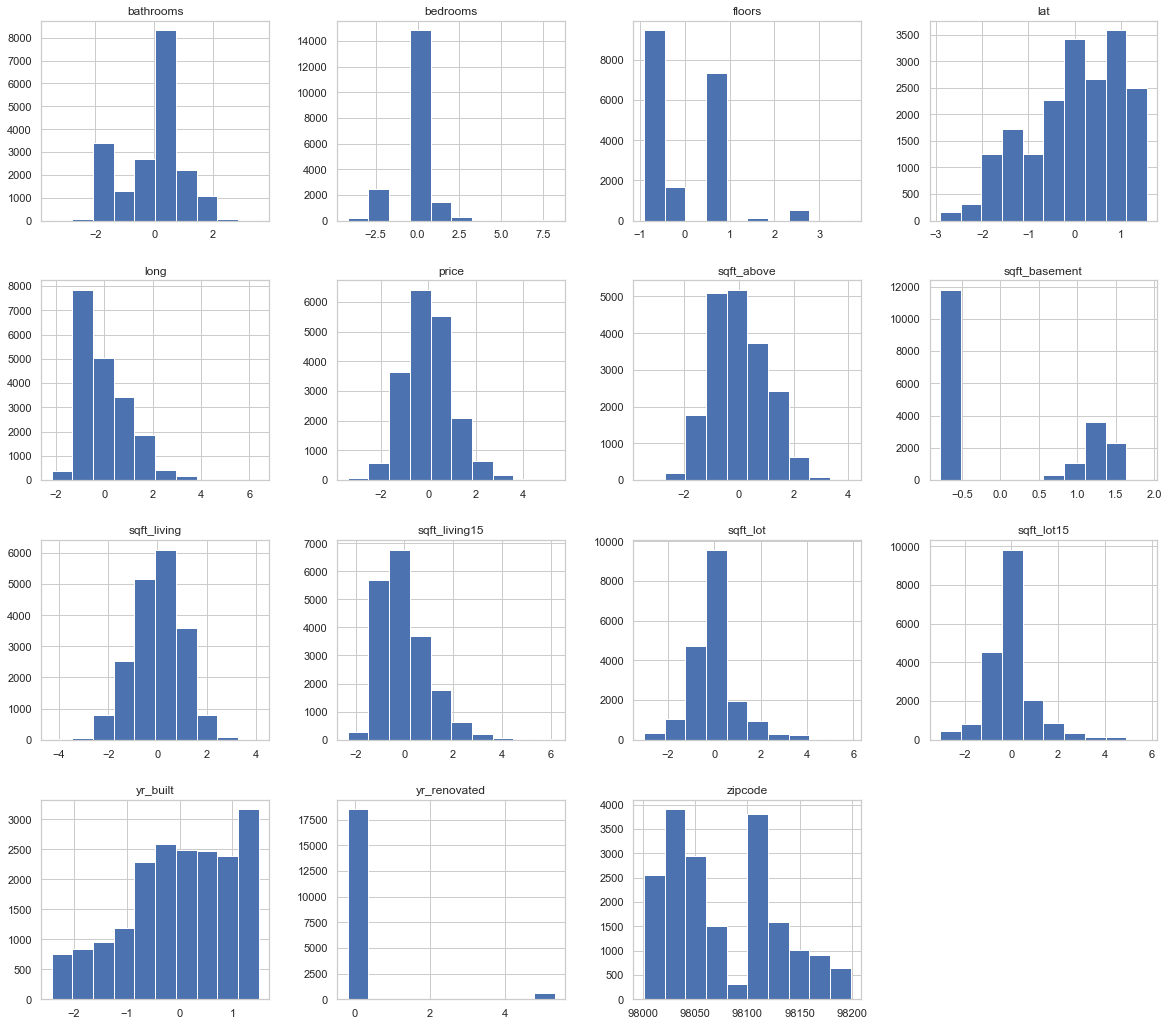

In [36]:
data.hist(figsize=(20,18))

* `price`, `sqft_above`, `sqft_living`, all have similar normal distributions
* `yr_renovated` and `sqft_basement` have clear outliers


/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


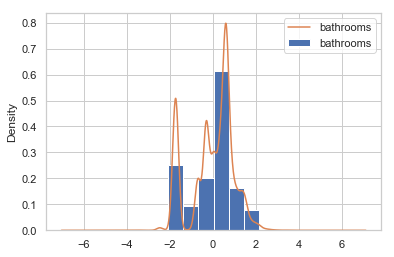

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


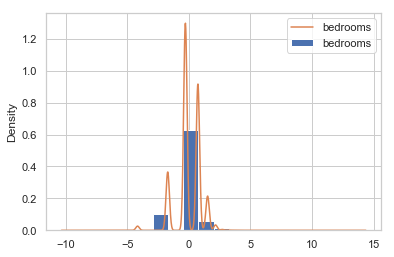

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


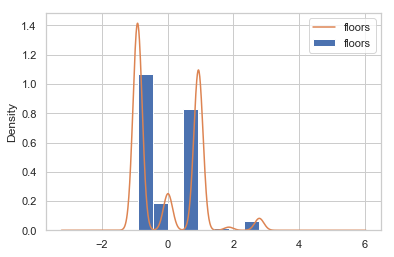

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


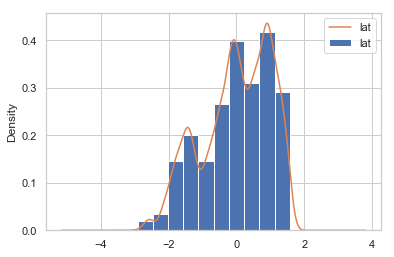

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


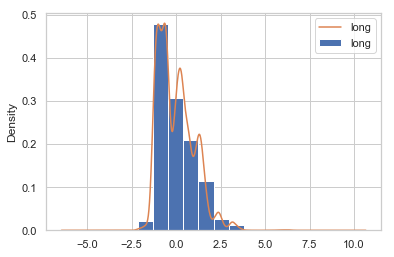

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


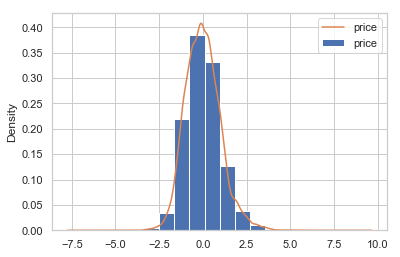

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


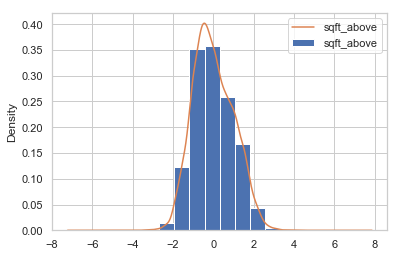

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


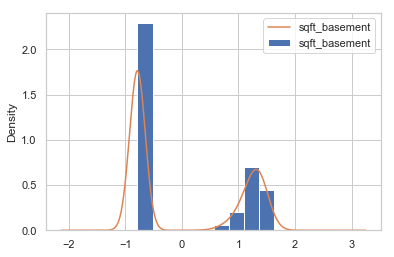

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


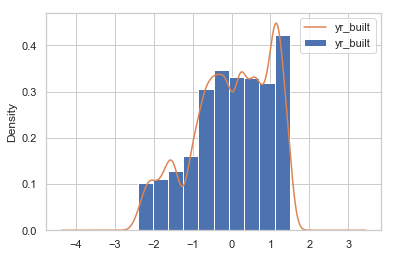

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


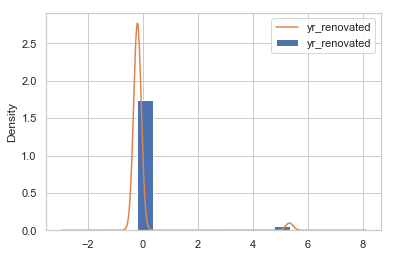

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


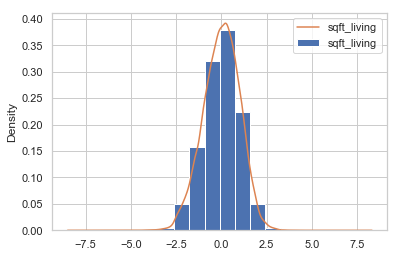

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


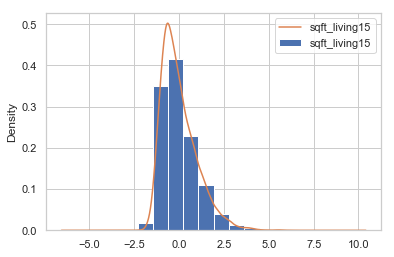

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


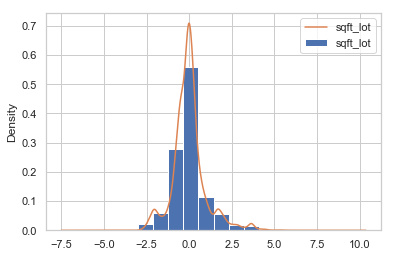

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


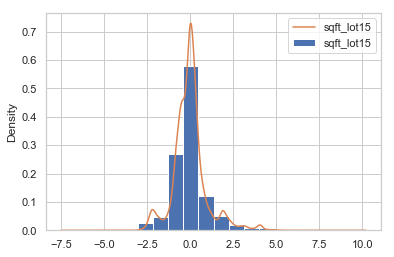

In [37]:
for column in ['bathrooms',
       'bedrooms', 'floors', 'lat', 'long', 'price', 
               'sqft_above', 'sqft_basement', 'yr_built',
               'yr_renovated','sqft_living', 'sqft_living15',
              'sqft_lot', 'sqft_lot15']:
    data[column].plot.hist(normed=True )
    data[column].plot.kde(label=column )
    plt.legend()
    plt.show()

* This further confirms our observations from  simple histograms

#### Further asses the data with a joint plot

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


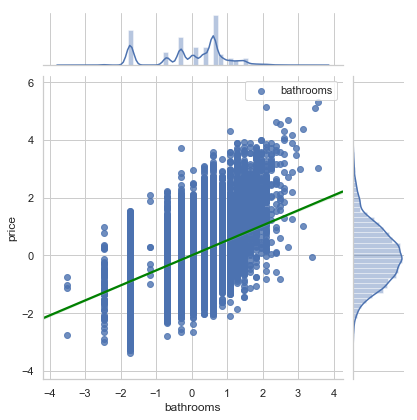

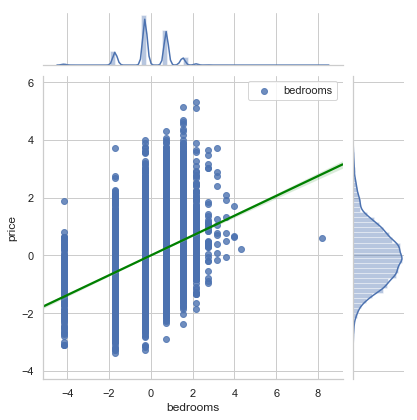

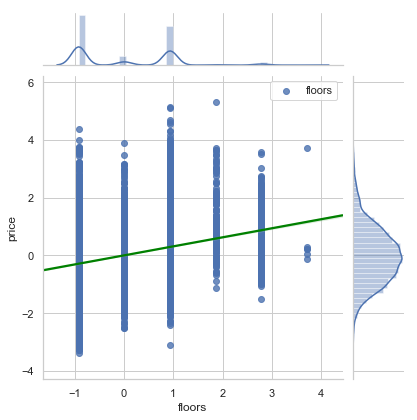

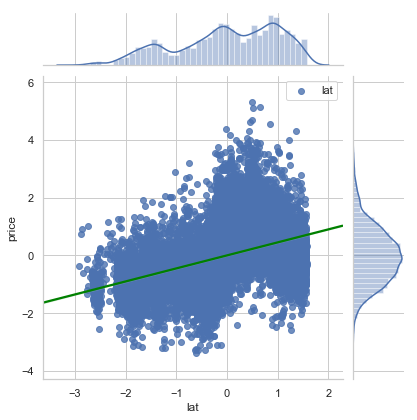

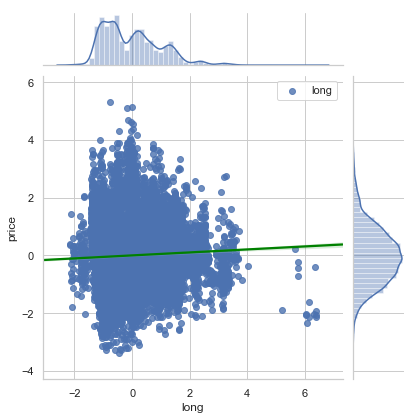

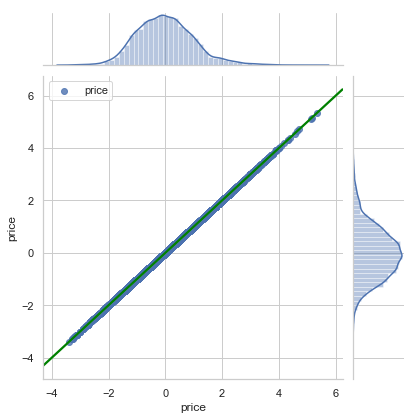

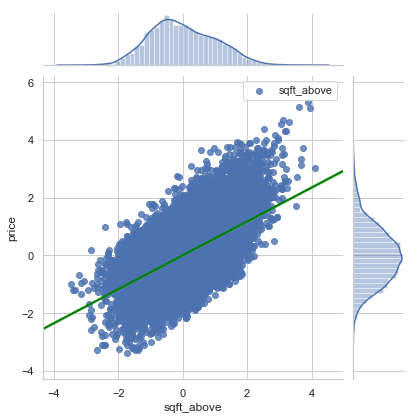

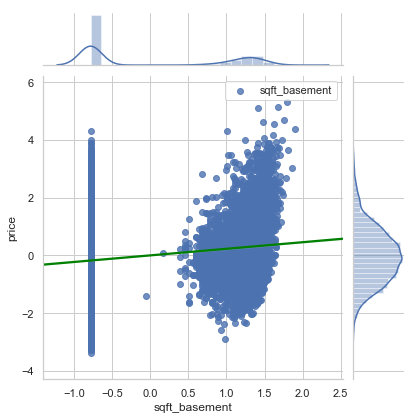

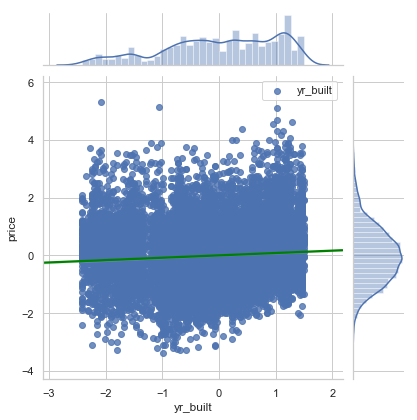

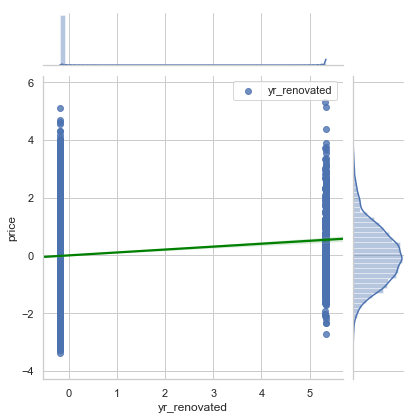

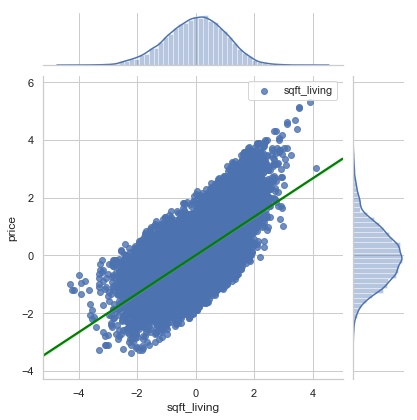

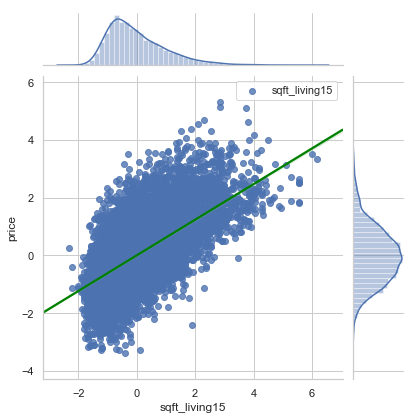

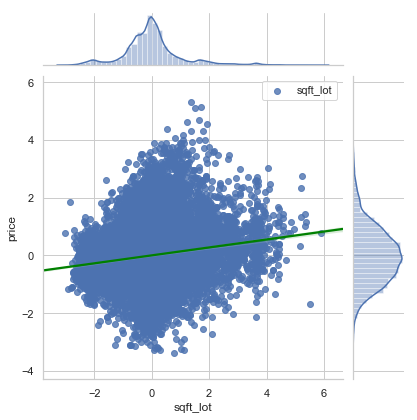

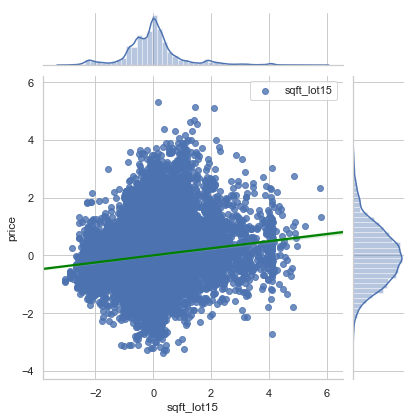

In [38]:
for column in ['bathrooms',
       'bedrooms', 'floors', 'lat', 'long', 'price', 
               'sqft_above', 'sqft_basement', 'yr_built', 
               'yr_renovated', 'sqft_living', 'sqft_living15',
              'sqft_lot', 'sqft_lot15']:
    sns.jointplot(x=column, y="price",
                  data=data, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})

    plt.legend()
    plt.show()

* Joint plots further confirm our observations we made earlier.
* Some distributions are *almost* uniformly distributed while other have multiple common values
* `bathrooms`, `bedrooms`, `sqft_above`, `sqft_living`, and `sqft_living15` have strong positive correlation with price
* `long`, `yr_built`, and `yr_renovated` almost have no clear relationship with sales.
* For above variables we see a straightline along the y-intercept i.e. no slope > no linear relation
* The `sqft` variables have the best poritive relationship with `price`

# Modeling the Data

In [39]:
data_cleaned = pd.get_dummies(data)

In [40]:
data_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
1,0.277200,-0.280886,0.338175,0.718286,-0.114854,0.934332,0.668159,1.114830,-0.681895,5.330753,...,0,1,0,0,0,0,0,0,0,0
2,-1.799697,-1.712375,-1.728633,-2.229001,0.242486,-0.916465,-1.749465,-0.784243,-1.294390,-0.187517,...,0,0,1,0,0,0,0,0,0,0
3,0.496698,0.734772,1.071387,0.097183,-0.525095,-0.916465,-1.025748,1.375367,-0.205511,-0.187517,...,0,1,0,0,0,0,0,0,0,0
4,0.175816,-0.280886,0.037983,-0.266149,0.006399,-0.916465,0.070962,-0.784243,0.543094,-0.187517,...,0,0,1,0,0,0,0,0,0,0
5,1.845750,0.734772,2.104791,2.323891,2.813502,-0.916465,2.030127,1.540054,1.019478,-0.187517,...,0,0,0,0,0,1,0,0,0,0


View `info` for the numerical data

In [41]:
data_cleaned.iloc[:,0:10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 10 columns):
price            19164 non-null float64
bedrooms         19164 non-null float64
bathrooms        19164 non-null float64
sqft_living      19164 non-null float64
sqft_lot         19164 non-null float64
floors           19164 non-null float64
sqft_above       19164 non-null float64
sqft_basement    19164 non-null float64
yr_built         19164 non-null float64
yr_renovated     19164 non-null float64
dtypes: float64(10)
memory usage: 1.6 MB


Ensure all dummy columns are tagged as categorical variables.

In [42]:
for cat_names in data_cleaned.iloc[:,10:].columns:
         data_cleaned[cat_names] = data_cleaned[cat_names].astype('category')

In [43]:
print(data.view.dtype)

object


In [44]:
data_cleaned.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
count,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,19164.000000
mean,1.483078e-16,-1.408924e-16,-2.728864e-16,-8.180659e-15,-4.745850e-16,1.898340e-16,-2.473774e-15,-9.046777e-17,-3.203449e-15,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-3.385959e+00,-4.159522e+00,-3.495249e+00,-4.295281e+00,-3.031509e+00,-9.164650e-01,-3.459590e+00,-7.842426e-01,-2.417296e+00,-0.187517
25%,-6.964821e-01,-2.808858e-01,-3.023471e-01,-6.540572e-01,-5.162710e-01,-9.164650e-01,-7.141644e-01,-7.842426e-01,-6.818953e-01,-0.187517
50%,-6.160393e-02,-2.808858e-01,3.381750e-01,4.901381e-02,-5.851111e-02,8.933349e-03,-1.019618e-01,-7.842426e-01,1.347640e-01,-0.187517
75%,6.182243e-01,7.347720e-01,6.067060e-01,7.006803e-01,3.194778e-01,9.343317e-01,7.189475e-01,1.209952e+00,8.833684e-01,-0.187517
max,5.325019e+00,8.184852e+00,3.571215e+00,4.113463e+00,5.897642e+00,3.710527e+00,4.091374e+00,1.903771e+00,1.495863e+00,5.339457


In [45]:
import statsmodels.formula.api as smf

In [46]:
col_names = data_cleaned.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("KC Housing: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=data_cleaned).fit()
    X_new = pd.DataFrame({val: [data_cleaned[val].min(), data_cleaned[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])
    print(" ")

KC Housing: price~bedrooms
------------------------------
['bedrooms', 0.1183409291608224, 1.5439038936193583e-16, 0.34400716440333534, 0.0]
 
KC Housing: price~bathrooms
------------------------------
['bathrooms', 0.2707359493018203, 1.5439038936193583e-16, 0.5203229279032604, 0.0]
 
KC Housing: price~sqft_living
------------------------------
['sqft_living', 0.4452920119002841, 5.610095721308994e-15, 0.6673020394845826, 0.0]
 
KC Housing: price~sqft_lot
------------------------------
['sqft_lot', 0.01895466977814919, 1.5439038936193583e-16, 0.13767595933259102, 9.856372523957824e-82]
 
KC Housing: price~floors
------------------------------
['floors', 0.0984951950330133, 1.5439038936193583e-16, 0.31383944148722764, 0.0]
 
KC Housing: price~sqft_above
------------------------------
['sqft_above', 0.34613849890922566, 1.5439038936193583e-16, 0.5883353626200164, 0.0]
 
KC Housing: price~sqft_basement
------------------------------
['sqft_basement', 0.05202079382292246, 1.54390389361935

In [47]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.118341,1.5439e-16,0.344007,0
2,bathrooms,0.270736,1.5439e-16,0.520323,0
3,sqft_living,0.445292,5.6101e-15,0.667302,0
4,sqft_lot,0.0189547,1.5439e-16,0.137676,9.85637e-82
5,floors,0.0984952,1.5439e-16,0.313839,0
6,sqft_above,0.346138,1.5439e-16,0.588335,0
7,sqft_basement,0.0520208,1.5439e-16,0.228081,1.29308e-224
8,yr_built,0.00671185,1.5439e-16,0.0819259,6.63749e-30
9,yr_renovated,0.0102159,1.5439e-16,0.101074,1.06478e-44


* Continuing with our original hypothesis of greater sqft = higher higher price - `sqft_living` has the highest r_squared value.
* `yr_built` has an r_squared values < .01, so it can be considered to drop this predictor
* With all of our p-values being close to or equal to 0 we can assume that each predictor has some effect on price

Rename all columns that have a '.' or '/'. They will hinder our model from running.

In [48]:
data_cleaned = data_cleaned.rename(columns={'waterfront_0.0': 'waterfront_0', 'waterfront_1.0': 'waterfront_1', 
                                            'view_0.0': 'view_0', 'view_1.0': 'view_1', 'view_2.0': 'view_2',
                                           'view_3.0': 'view_3', 'view_4.0': 'view_4'})

In [49]:
for i in range(0,len(data_cleaned.columns)):
               data_cleaned.columns[i]

Run an OLS model for our categorical data set.

In [50]:
cols_waterfront = data_cleaned.columns[15:16]
cols_view = data_cleaned.columns[17:21]
cols_condition = data_cleaned.columns[22:26]
cols_grade = data_cleaned.columns[27:37]
cols_month= data_cleaned.columns[38:49]

cols = [cols_waterfront , cols_view, cols_condition, cols_grade, cols_month]
for col in cols:
    print(str(col))
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data= data_cleaned).fit()
    print(model.summary())

Index(['waterfront_0'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     632.3
Date:                Thu, 24 Jan 2019   Prob (F-statistic):          2.68e-137
Time:                        09:04:00   Log-Likelihood:                -26881.
No. Observations:               19164   AIC:                         5.377e+04
Df Residuals:                   19162   BIC:                         5.378e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.055
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           6.19e-08
Time:                        09:04:00   Log-Likelihood:                -27164.
No. Observations:               19164   AIC:                         5.435e+04
Df Residuals:                   19152   BIC:                         5.445e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0293      0.025     -1.155

* `grade` has high r_squared value - there may be strong predictor
* `month` has a low r_squared value - it can be considered to drop column

In [51]:
kc_house_final = data_cleaned.drop(["yr_built", "month_1", "month_2", "month_3", "month_4", "month_5", "month_6", "month_7", "month_8", "month_9", "month_10", "month_11", "month_12",], axis=1)
kc_house_final.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_renovated
count,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,1.916400e+04,19164.000000
mean,1.483078e-16,-1.408924e-16,-2.728864e-16,-8.180659e-15,-4.745850e-16,1.898340e-16,-2.473774e-15,-9.046777e-17,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-3.385959e+00,-4.159522e+00,-3.495249e+00,-4.295281e+00,-3.031509e+00,-9.164650e-01,-3.459590e+00,-7.842426e-01,-0.187517
25%,-6.964821e-01,-2.808858e-01,-3.023471e-01,-6.540572e-01,-5.162710e-01,-9.164650e-01,-7.141644e-01,-7.842426e-01,-0.187517
50%,-6.160393e-02,-2.808858e-01,3.381750e-01,4.901381e-02,-5.851111e-02,8.933349e-03,-1.019618e-01,-7.842426e-01,-0.187517
75%,6.182243e-01,7.347720e-01,6.067060e-01,7.006803e-01,3.194778e-01,9.343317e-01,7.189475e-01,1.209952e+00,-0.187517
max,5.325019e+00,8.184852e+00,3.571215e+00,4.113463e+00,5.897642e+00,3.710527e+00,4.091374e+00,1.903771e+00,5.339457


### Feature ranking with recursive feature elimination

Create a matrix X and y containing the predictors and target for the model. Use Scikit-Learn's RFE function, documentation.

In [52]:
y = kc_house_final[["price"]]
X = kc_house_final.drop(["price"], axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_renovated,zipcode,lat,...,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
1,-0.280886,0.338175,0.718286,-0.114854,0.934332,0.668159,1.114830,5.330753,98125,1.160978,...,0,0,0,0,0,0,0,1,0,0
2,-1.712375,-1.728633,-2.229001,0.242486,-0.916465,-1.749465,-0.784243,-0.187517,98028,1.282859,...,0,0,0,0,0,0,1,0,0,0
3,0.734772,1.071387,0.097183,-0.525095,-0.916465,-1.025748,1.375367,-0.187517,98136,-0.282833,...,0,0,0,0,0,0,0,1,0,0
4,-0.280886,0.037983,-0.266149,0.006399,-0.916465,0.070962,-0.784243,-0.187517,98074,0.409504,...,0,0,0,0,0,0,0,0,1,0
5,0.734772,2.104791,2.323891,2.813502,-0.916465,2.030127,1.540054,-0.187517,98053,0.692930,...,1,0,0,0,0,0,0,0,0,0


Create a for loop using RFE where we look at the 5, 15, 25,... up until 45 best features to be selected according to the feature ranking algorithm. Store the R-squared and the adjusted-R-squareds for all these models in a list.

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [54]:
r_list = []
adj_r_list = []
list_n = list(range(5,45,5))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

price    0.146635
dtype: float64
price    0.145029
dtype: float64
price    0.512312
dtype: float64
price    0.511395
dtype: float64
price    0.711246
dtype: float64
price    0.710703
dtype: float64
price    0.744965
dtype: float64
price    0.744485
dtype: float64
price    0.749498
dtype: float64
price    0.749027
dtype: float64
price    0.757776
dtype: float64
price    0.75732
dtype: float64
price    0.759677
dtype: float64
price    0.759224
dtype: float64
price    0.759677
dtype: float64
price    0.759224
dtype: float64


The difference between $R^2$ and adjusted $R^2$ is negligible, and seems to continue to be going up as we include more features. We're likely overfitting when including 45 features. Rerun using a train test split.

### Train-test-split

Create a similar for loop to before. Except, this time

* Use a train test split of 20-80
* Instead of looking at $R^2$ and $R^2_{adj}$, look at the MSE for train and test

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price    0.847187
dtype: float64
price    0.878005
dtype: float64
price    0.287437
dtype: float64
price    0.294328
dtype: float64
price    0.24483
dtype: float64
price    0.254706
dtype: float64
price    0.238216
dtype: float64
price    0.249421
dtype: float64
price    0.238216
dtype: float64
price    0.249421
dtype: float64
price    0.238216
dtype: float64
price    0.249421
dtype: float64
price    0.238216
dtype: float64
price    0.249421
dtype: float64
price    0.238216
dtype: float64
price    0.249421
dtype: float64
price    0.238216
dtype: float64
price    0.249421
dtype: float64


We see that the MSE jumps to an  ideal accuracy when there are 3-5 informative features are captured, then plateaus in accuracy as the non informative features are added into the model. 

### 10-fold cross validation with the final model

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# select 45 best predictors

select_85 = RFE(linreg, n_features_to_select = 85)
select_85 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.23649182, -0.26042306, -0.24438096, -0.25134974, -0.23174412,
       -0.24540708, -0.24754896, -0.25010873, -0.25031747, -0.20286663])

# Summary

This project goes through the OSEMN framework of 

* Obatinaing data our data from the `kc_house` data set

* Scrubbing our data to enure no null values will hinder our model, and that numerical and categorical data are properly tagged.

* Exploring our data to begin creating and validating a hypotheses. This also allows us to catch any issues with our set that will need to be changed prior to modeling. Here we started to see that predictors that were related to the the square footage of the house had strong correltions with `price`

* As we modeled our data we learned that the `grade` category is also a strong predictor of `price`. Additionally, our model should ideally have 3-5 features to accurately predict `price`.